In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

import pandas_datareader.data as web

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

import warnings
warnings.filterwarnings('ignore')

In [44]:
#df = pd.read_csv('data/apple_2012_1_1-2019_12_17.csv', parse_dates=True, index_col=[0])

#Get the stock quote 
df = web.DataReader('DAL', data_source='yahoo', start='2012-01-01', end='2019-12-17') 

In [45]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,8.30,8.02,8.23,8.04,7093200.0,7.141504
2012-01-04,8.14,7.83,8.03,8.01,7412900.0,7.114857
2012-01-05,8.35,7.87,8.03,8.33,10509800.0,7.399095
2012-01-06,8.43,8.24,8.26,8.32,6683300.0,7.390213
2012-01-09,8.50,8.26,8.34,8.28,9015700.0,7.354685


In [46]:
df.shape

(2003, 6)

Text(0, 0.5, 'Close Price USD ($)')

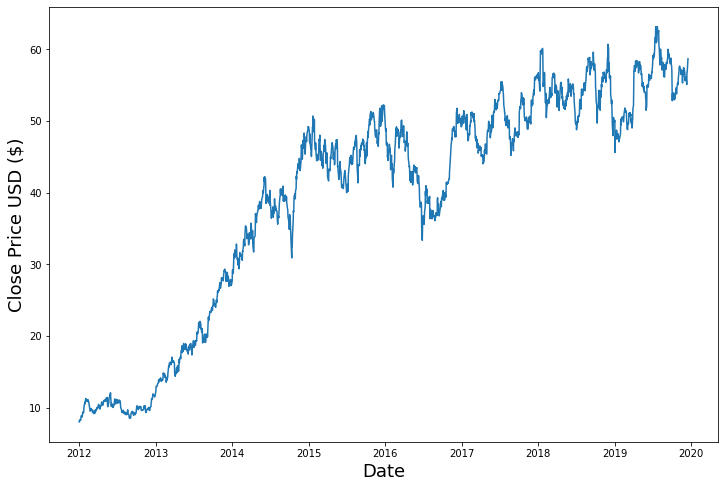

In [47]:
plt.figure(figsize=(12,8))
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

In [48]:
#df = df.diff().dropna() #zip_df[11226].diff().dropna()


In [49]:
dataset = df['Close']
# dataset = data.values

In [50]:
def preprocessing(df,percentage):
    training_data_len = int(np.round(len(df) * percentage))
    dataset = pd.DataFrame(df)
    scaler = MinMaxScaler(feature_range = (0, 1))
    scaled_data = scaler.fit_transform(dataset)
    return training_data_len, dataset, scaler, scaled_data

In [51]:
training_data_len, dataset, scaler, scaled_data = preprocessing(dataset, percentage=.8)

In [52]:
#training_data_len = int(np.round(len(dataset) * .8))

In [53]:
training_data_len

1602

In [54]:
#dataset = pd.DataFrame(dataset)

In [55]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range = (0, 1))
# scaled_data = scaler.fit_transform(dataset)
# scaled_data

In [56]:
def create_sets(training_data_len):
    #create training data set
    train_data = scaled_data[0:training_data_len,:]
    test_data = scaled_data[training_data_len -60:,:] #to 2003 which is end of dataset
    #split data into X_train and y_train data sets
    X_train = []
    y_train = []
    #create dataset X_test and y_test data sets
    X_test = []
    y_test = dataset.iloc[training_data_len:, :]


    for i in range(60, len(train_data)):
        X_train.append(train_data[i-60:i])
        y_train.append(train_data[i,0]) #will contain 61st value which will be at position 60
        if i <=61:
            print(X_train)
            print(y_train)
            print()

    for i in range(60, len(test_data)):
        X_test.append(test_data[i-60:i,0]) 
        
    return X_train, X_test, y_train, y_test    

In [57]:
X_train, X_test, y_train, y_test = create_sets(training_data_len)

[array([[0.00054397],
       [0.        ],
       [0.00580235],
       [0.00562102],
       [0.00489573],
       [0.00471442],
       [0.01087941],
       [0.01559383],
       [0.01523119],
       [0.01305529],
       [0.01650045],
       [0.02393472],
       [0.02538531],
       [0.02320942],
       [0.02484134],
       [0.03535811],
       [0.03916591],
       [0.04315503],
       [0.05004534],
       [0.04605621],
       [0.05240253],
       [0.05602901],
       [0.05965548],
       [0.05403444],
       [0.05367181],
       [0.05403444],
       [0.05639165],
       [0.05222122],
       [0.05693562],
       [0.05312782],
       [0.05113327],
       [0.05294651],
       [0.05113327],
       [0.03699003],
       [0.03481414],
       [0.03046236],
       [0.02756119],
       [0.0299184 ],
       [0.03427016],
       [0.03263826],
       [0.02955576],
       [0.03191297],
       [0.03009973],
       [0.02447868],
       [0.02466001],
       [0.02647326],
       [0.02466001],
       [0.02

In [58]:
"""
61st value we want model to predict
"""

# #create training data set
# train_data = scaled_data[0:training_data_len,:]
# test_data = scaled_data[training_data_len -60:,:] #to 2003 which is end of dataset
# #split data into X_train and y_train data sets
# X_train = []
# y_train = []
# #create dataset X_test and y_test data sets
# X_test = []
# y_test = dataset.iloc[training_data_len:, :]


# for i in range(60, len(train_data)):
#     X_train.append(train_data[i-60:i])
#     y_train.append(train_data[i,0]) #will contain 61st value which will be at position 60
#     if i <=61:
#         print(X_train)
#         print(y_train)
#         print()
        
# for i in range(60, len(test_data)):
#     X_test.append(test_data[i-60:i,0])        

'\n61st value we want model to predict\n'

In [59]:
#convert X_train and y_train to numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

In [60]:
X_train

array([[[5.43966150e-04],
        [0.00000000e+00],
        [5.80235171e-03],
        ...,
        [3.39075231e-02],
        [3.26382630e-02],
        [3.60834050e-02]],

       [[0.00000000e+00],
        [5.80235171e-03],
        [5.62102390e-03],
        ...,
        [3.26382630e-02],
        [3.60834050e-02],
        [3.73526651e-02]],

       [[5.80235171e-03],
        [5.62102390e-03],
        [4.89572994e-03],
        ...,
        [3.60834050e-02],
        [3.73526651e-02],
        [3.46328171e-02]],

       ...,

       [[8.01269281e-01],
        [8.14868556e-01],
        [8.13055278e-01],
        ...,
        [8.04351750e-01],
        [7.90752475e-01],
        [7.98730761e-01]],

       [[8.14868556e-01],
        [8.13055278e-01],
        [8.06165028e-01],
        ...,
        [7.90752475e-01],
        [7.98730761e-01],
        [8.13961951e-01]],

       [[8.13055278e-01],
        [8.06165028e-01],
        [8.18676336e-01],
        ...,
        [7.98730761e-01],
        [8.1396

In [61]:
X_train.shape

(1542, 60, 1)

In [62]:
#reshape X_train dataset
#before it's 2D
#X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1]))

In [63]:

model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 25))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [64]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 25)                1275      
__________

In [65]:
#train the model
model.fit(X_train,y_train, epochs=50, batch_size=32 ) #,callbacks=[early_stop]

Epoch 1/50
1542/1542 [==============================] - 12s 8ms/step - loss: 0.0447
Epoch 2/50
1542/1542 [==============================] - 11s 7ms/step - loss: 0.0045
Epoch 3/50
1542/1542 [==============================] - 14s 9ms/step - loss: 0.0039
Epoch 4/50
1542/1542 [==============================] - 11s 7ms/step - loss: 0.0033
Epoch 5/50
1542/1542 [==============================] - 11s 7ms/step - loss: 0.0031
Epoch 6/50
1542/1542 [==============================] - 10s 6ms/step - loss: 0.0030
Epoch 7/50
1542/1542 [==============================] - 11s 7ms/step - loss: 0.0032
Epoch 8/50
1542/1542 [==============================] - 10s 6ms/step - loss: 0.0027
Epoch 9/50
1542/1542 [==============================] - 10s 6ms/step - loss: 0.0027
Epoch 10/50
1542/1542 [==============================] - 11s 7ms/step - loss: 0.0024
Epoch 11/50
1542/1542 [==============================] - 10s 7ms/step - loss: 0.0026
Epoch 12/50
1542/1542 [==============================] - 10s 7ms/step - lo

In [66]:
#convert data to a numpy array
X_test = np.array(X_test)

In [67]:
X_test.shape

(401, 60)

In [68]:
#number of rows, number of timeseteps, number of features
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [69]:
X_test.shape

(401, 60, 1)

In [70]:
#get models predicted price values for X_test dataset
#want predcitions to contain same values as y_test dataset once we inverse_transform
#getting predcitiosn off of X_test
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions) #unscaling the values

In [71]:
predictions

array([[52.887817],
       [53.08443 ],
       [53.30243 ],
       [53.461597],
       [53.671894],
       [53.84907 ],
       [53.942066],
       [54.083656],
       [54.460133],
       [54.761406],
       [54.907646],
       [54.878788],
       [54.78538 ],
       [54.79106 ],
       [54.83065 ],
       [54.806664],
       [54.63073 ],
       [54.44547 ],
       [54.42061 ],
       [54.50117 ],
       [54.64078 ],
       [54.822098],
       [55.03879 ],
       [55.196495],
       [55.137417],
       [54.918423],
       [54.626236],
       [54.217934],
       [53.602463],
       [52.88928 ],
       [52.091118],
       [51.341938],
       [50.728348],
       [50.35627 ],
       [50.079044],
       [49.92625 ],
       [49.922882],
       [50.139786],
       [50.499046],
       [50.78484 ],
       [51.03924 ],
       [51.248966],
       [51.38011 ],
       [51.48811 ],
       [51.786167],
       [52.240105],
       [52.58968 ],
       [52.789043],
       [52.77782 ],
       [52.614147],


In [72]:
#evaluate model w/RMSE
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

Close    0.270659
dtype: float64

In [73]:
predictions = pd.DataFrame(predictions, columns=['Predictions'])

In [74]:
train = dataset[:training_data_len]
valid = dataset[training_data_len:] #data from index training_data_len to 

In [75]:
len(predictions), len(valid)

(401, 401)

In [76]:
valid.reset_index(inplace=True)

In [77]:
valid.head()

,Date,Close
0,2018-05-16,53.480000
1,2018-05-17,53.099998
2,2018-05-18,52.950001
3,2018-05-21,53.980000
4,2018-05-22,53.520000


In [78]:
predictions.head()

,Predictions
0,52.887817
1,53.084431
2,53.302429
3,53.461597
4,53.671894


In [79]:
valid['Prediction'] = predictions['Predictions']

In [80]:
valid1 = valid.set_index('Date')

In [81]:
valid1.head()

,Close,Prediction
Date,,
2018-05-16,53.480000,52.887817
2018-05-17,53.099998,53.084431
2018-05-18,52.950001,53.302429
2018-05-21,53.980000,53.461597
2018-05-22,53.520000,53.671894


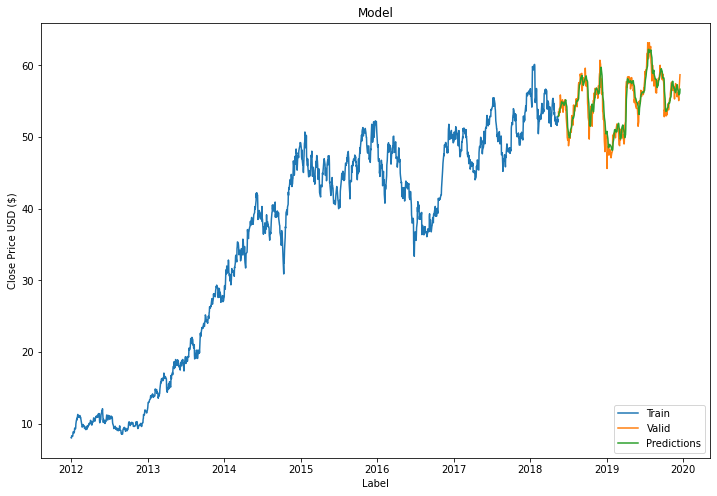

In [82]:
"""
blue-data model was trainined on 
orange-actual closing stock price for rest of days
green-what model predcited values to be
"""

# train = dataset[:training_data_len]
# valid = dataset[training_data_len:] #data from index training_data_len to 
# valid['Predictions'] = predictions
plt.figure(figsize=(12,8))
plt.title('Model')
plt.xlabel('Label')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
#plt.plot(valid[['Close','Predictions']])
plt.plot(valid1['Close'])
plt.plot(valid1['Prediction'])
# #valid[['Close','Predictions']].plot()
plt.legend(['Train','Valid','Predictions'],loc='lower right')

In [83]:
dataset.tail()

,Close
Date,
2019-12-11,55.080002
2019-12-12,56.689999
2019-12-13,56.730000
2019-12-16,58.419998
2019-12-17,58.689999


In [84]:
"""
predict closing price fo apple stock for 12/18/2019

get the quote
"""
#apple_quote = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2019-12-17')
##create a new dataframe

new_df = dataset.copy()
#get last 60days closing values and convert datframe to an array
last_60_days = new_df[-60:].values #converts to array
#scale data
last_60_days_scaled = scaler.transform(last_60_days)
#realreate empty list
x_test = []
#append last 60 days to x_test
x_test.append(last_60_days_scaled)
#conert x_test to a numpy array
x_test = np.array(x_test)
# #reshape the data
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
#get the predcited scaled price
pred_price = model.predict(x_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price) 
#print predcied price
#what model thinks predcited price will be for 12/18/2019
#the actual prcie was $69.94
#AMZN: 1,784.03
#AMGN: 241.94
print(pred_price)                    

[[57.408066]]
